In [ ]:
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call.
In your quest, you might need to ask a bunch of other questions, such as:
● Can I count something interesting?
● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
● Can I make a bar plot or a histogram?
● Can I compare two related quantities?
● Can I make a scatterplot?
● Can I make a time-series plot?
● Looking at the plots, what are some insights I can make?
● Can I see any correlations?
● Is there a hypothesis I can - and should - investigate further?
● What other questions are the insights leading me to ask?


In [ ]:
Take a look at the data: explore it.
- income data and some personal information. Lets try to predict income based on those factors and see which category is the best at predicting income

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("adult.csv")
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
(48842, 15)


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [4]:
selected_features = ["age", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
correlation_matrix = df[selected_features].corr()

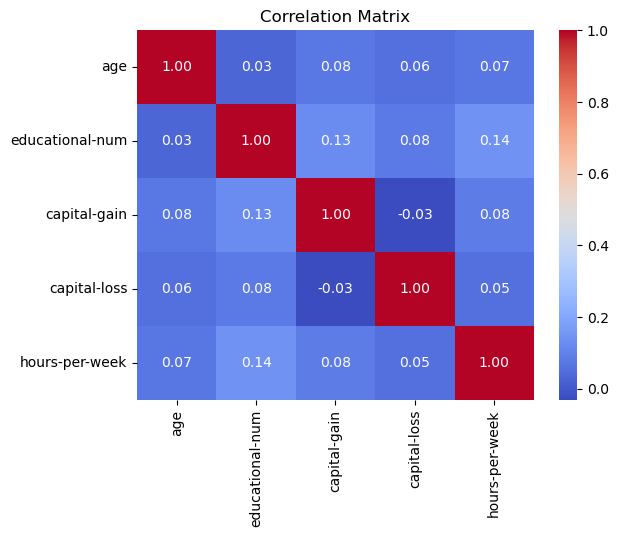

In [5]:

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
# could create correlation matrix for categorical  features.

In [ ]:
# could create correlation matrix for categorical  features. - Cramer V matrix

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Function to calculate Cramer's V for two columns
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))


# Initialize an empty DataFrame to hold Cramer's V results
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Calculate Cramer's V for each pair of categorical columns and fill in the DataFrame
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
workclass,1.0,0.098444,0.084506,0.399724,0.099983,0.056883,0.151246,0.031524
education,0.098444,1.0,0.089234,0.185941,0.121423,0.070852,0.091589,0.127019
marital-status,0.084506,0.089234,1.0,0.130568,0.488059,0.082269,0.459324,0.059368
occupation,0.399724,0.185941,0.130568,1.0,0.177452,0.077071,0.423881,0.062412
relationship,0.099983,0.121423,0.488059,0.177452,1.0,0.096989,0.64647,0.073841
race,0.056883,0.070852,0.082269,0.077071,0.096989,1.0,0.11361,0.400618
gender,0.151246,0.091589,0.459324,0.423881,0.64647,0.11361,0.999954,0.053762
native-country,0.031524,0.127019,0.059368,0.062412,0.073841,0.400618,0.053762,1.0


In [ ]:
Relationship and Gender: The strongest association is between 'relationship' and 'gender', with a Cramér's V value close to 0.646, which suggests a strong relationship between these two variables.
Marital Status and Income: The 'marital-status' variable has a relatively strong association with 'income', with a Cramér's V value of approximately 0.448.
Relationship and Income: Similarly, 'relationship' has a strong association with 'income', with a value of approximately 0.454.
Education and Income: 'Education' also shows a notable association with 'income', having a Cramér's V value of approximately 0.365.
Occupation and Gender: 'Occupation' and 'gender' have a Cramér's V value of about 0.424, indicating a significant association.

In [ ]:
# There Appears to be no significant  linear correlations between the components of the dataset. so lets go with a model that can handle nonlinear relationships like XGBoost

In [ ]:
## Exploratory Analysis

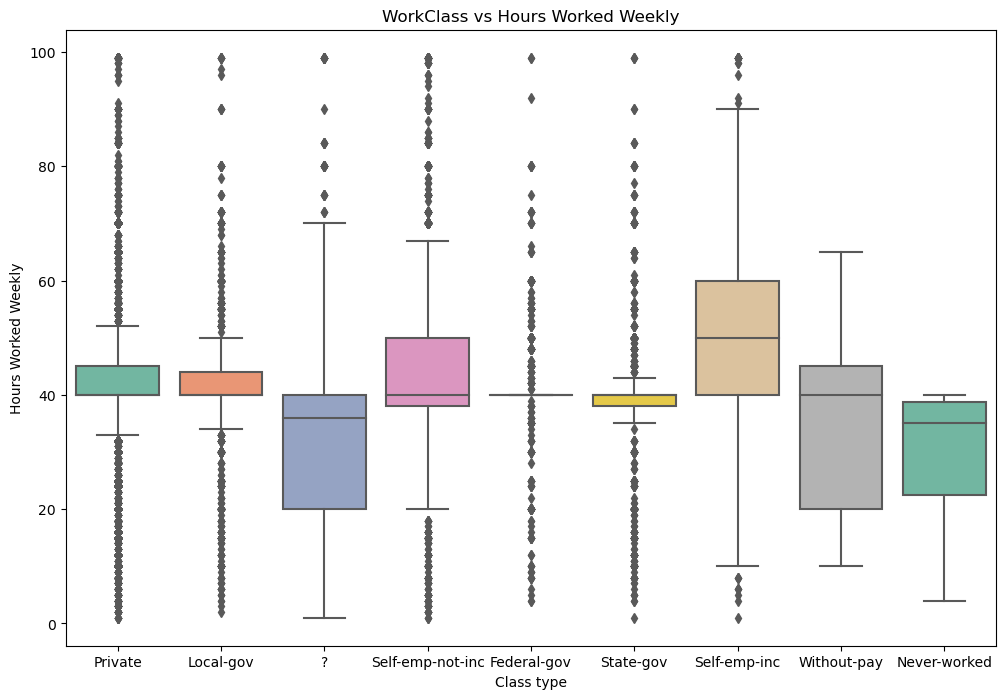

In [47]:
# Select relevant columns for the plot
plot_data = df[['workclass', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='workclass', y='hours-per-week', data=plot_data, palette='Set2')
plt.title('WorkClass vs Hours Worked Weekly')
plt.xlabel('Class type')
plt.ylabel('Hours Worked Weekly')
plt.show()

In [ ]:
- self employeed inviduals seem to have the largest distribution of time worked
- state gov/ federal govt has lowest spread and is expected
- without pay 

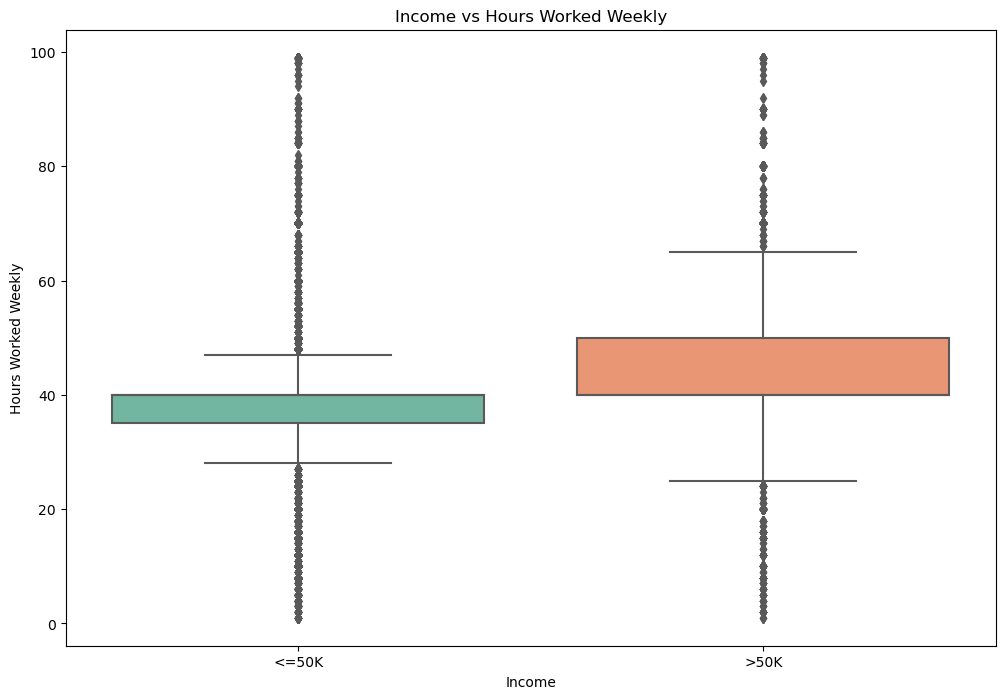

In [48]:

plot_data = df[['income', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='income', y='hours-per-week', data=plot_data,order=['<=50K', '>50K'], palette='Set2')
plt.title('Income vs Hours Worked Weekly')
plt.xlabel('Income')
plt.ylabel('Hours Worked Weekly')
plt.show()

In [ ]:
-  workers that work over 40 hrs per week earn more.

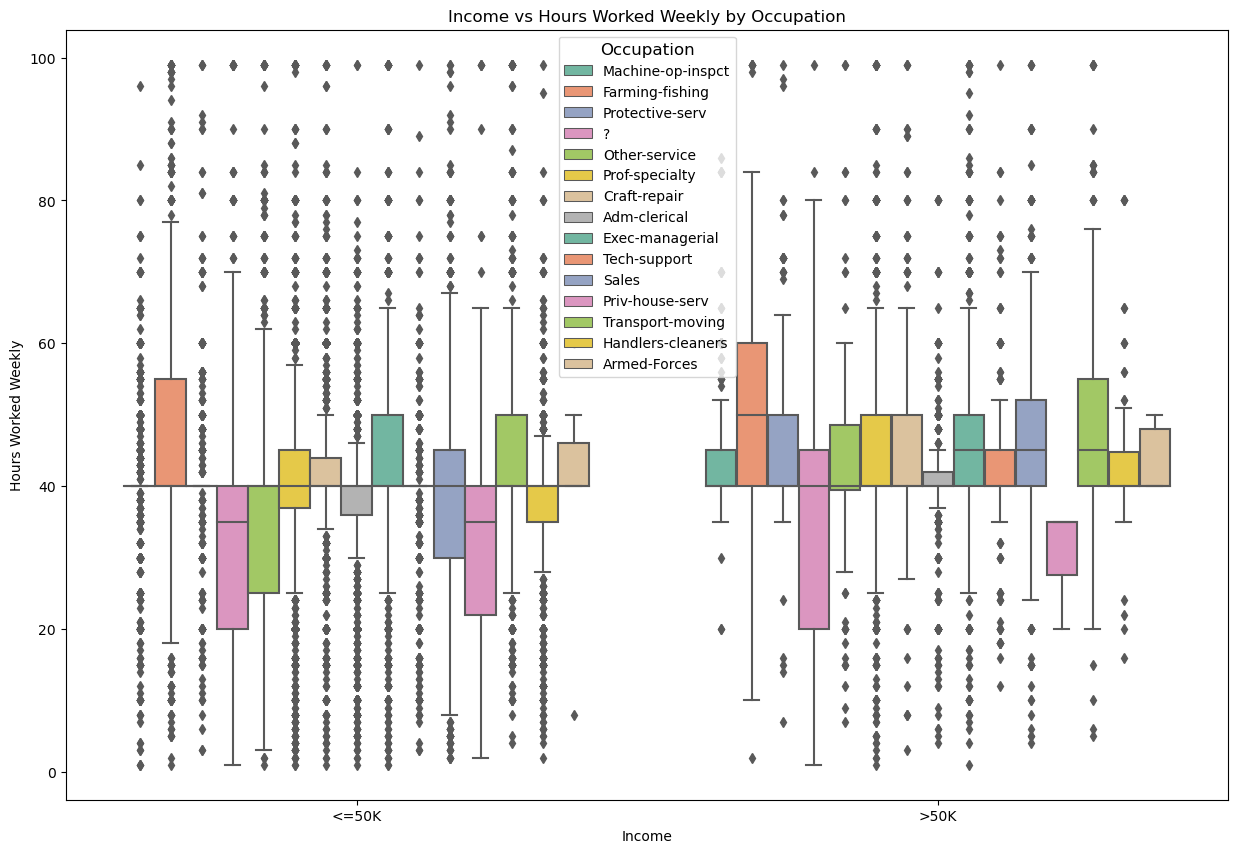

In [49]:
plot_data = df[['income', 'occupation', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='income', y='hours-per-week', hue='occupation', data=plot_data, order=['<=50K', '>50K'], palette='Set2')
plt.title('Income vs Hours Worked Weekly by Occupation')
plt.xlabel('Income')
plt.ylabel('Hours Worked Weekly')
plt.legend(title='Occupation', title_fontsize='12')
plt.show()

In [ ]:
# Findings - 

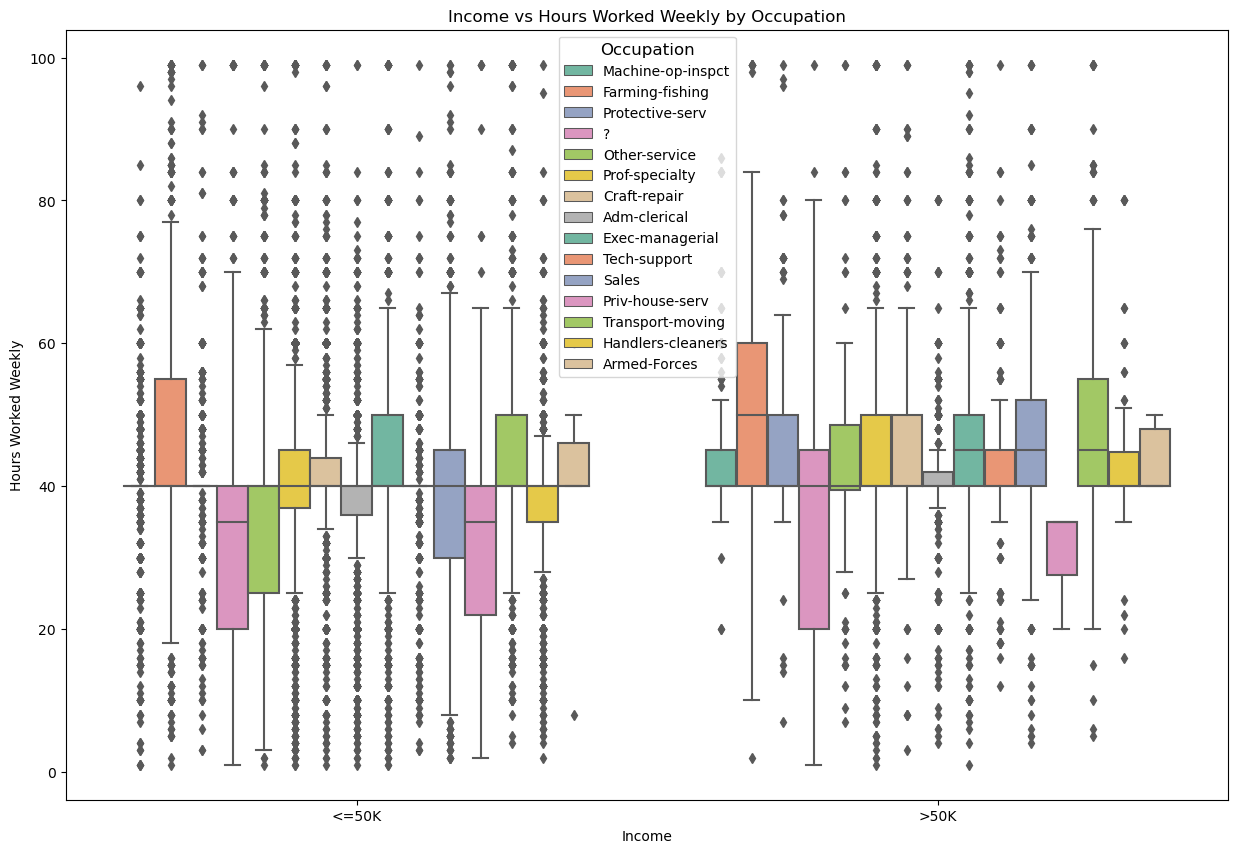

In [50]:
plot_data = df[['income', 'occupation', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='income', y='hours-per-week', hue='occupation', data=plot_data, order=['<=50K', '>50K'], palette='Set2')
plt.title('Income vs Hours Worked Weekly by Occupation')
plt.xlabel('Income')
plt.ylabel('Hours Worked Weekly')
plt.legend(title='Occupation', title_fontsize='12')
plt.show()

In [ ]:
#findings -

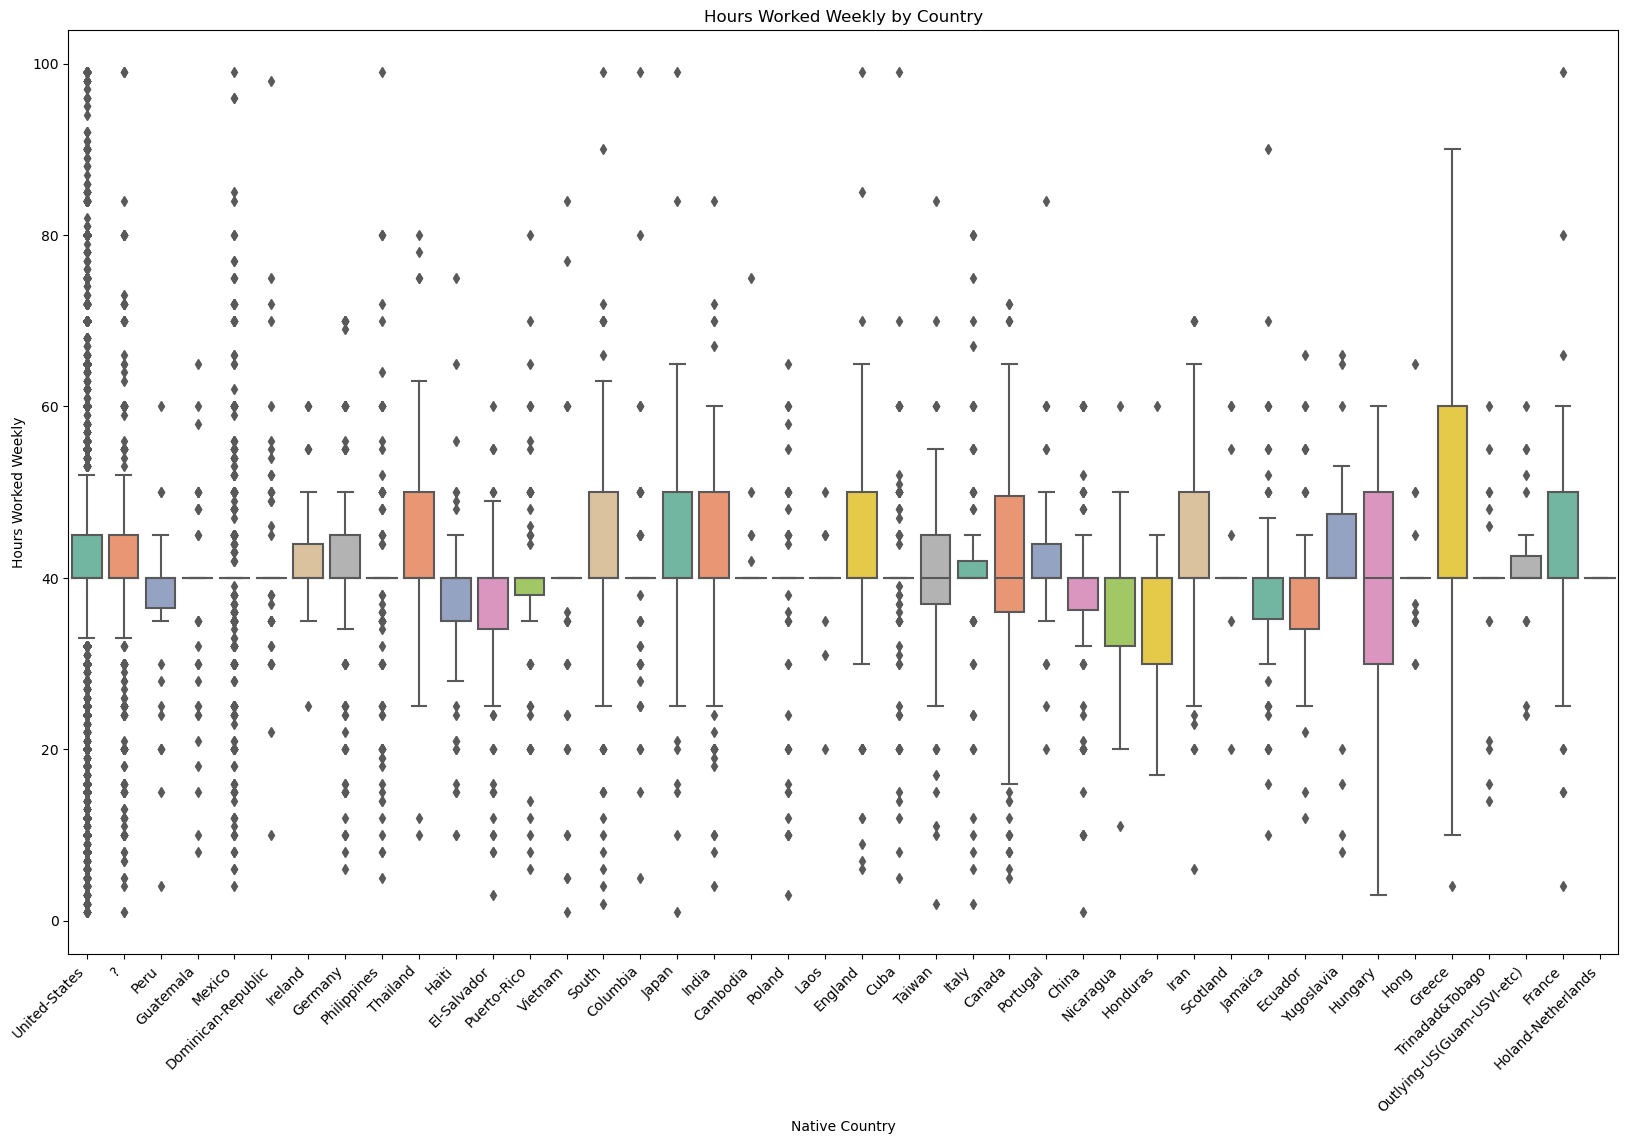

In [51]:
plot_data = df[['native-country', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(20, 12))
sns.boxplot(x='native-country', y='hours-per-week', data=plot_data, palette='Set2')
plt.title('Hours Worked Weekly by Country')
plt.xlabel('Native Country')
plt.ylabel('Hours Worked Weekly')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
#Findings - 

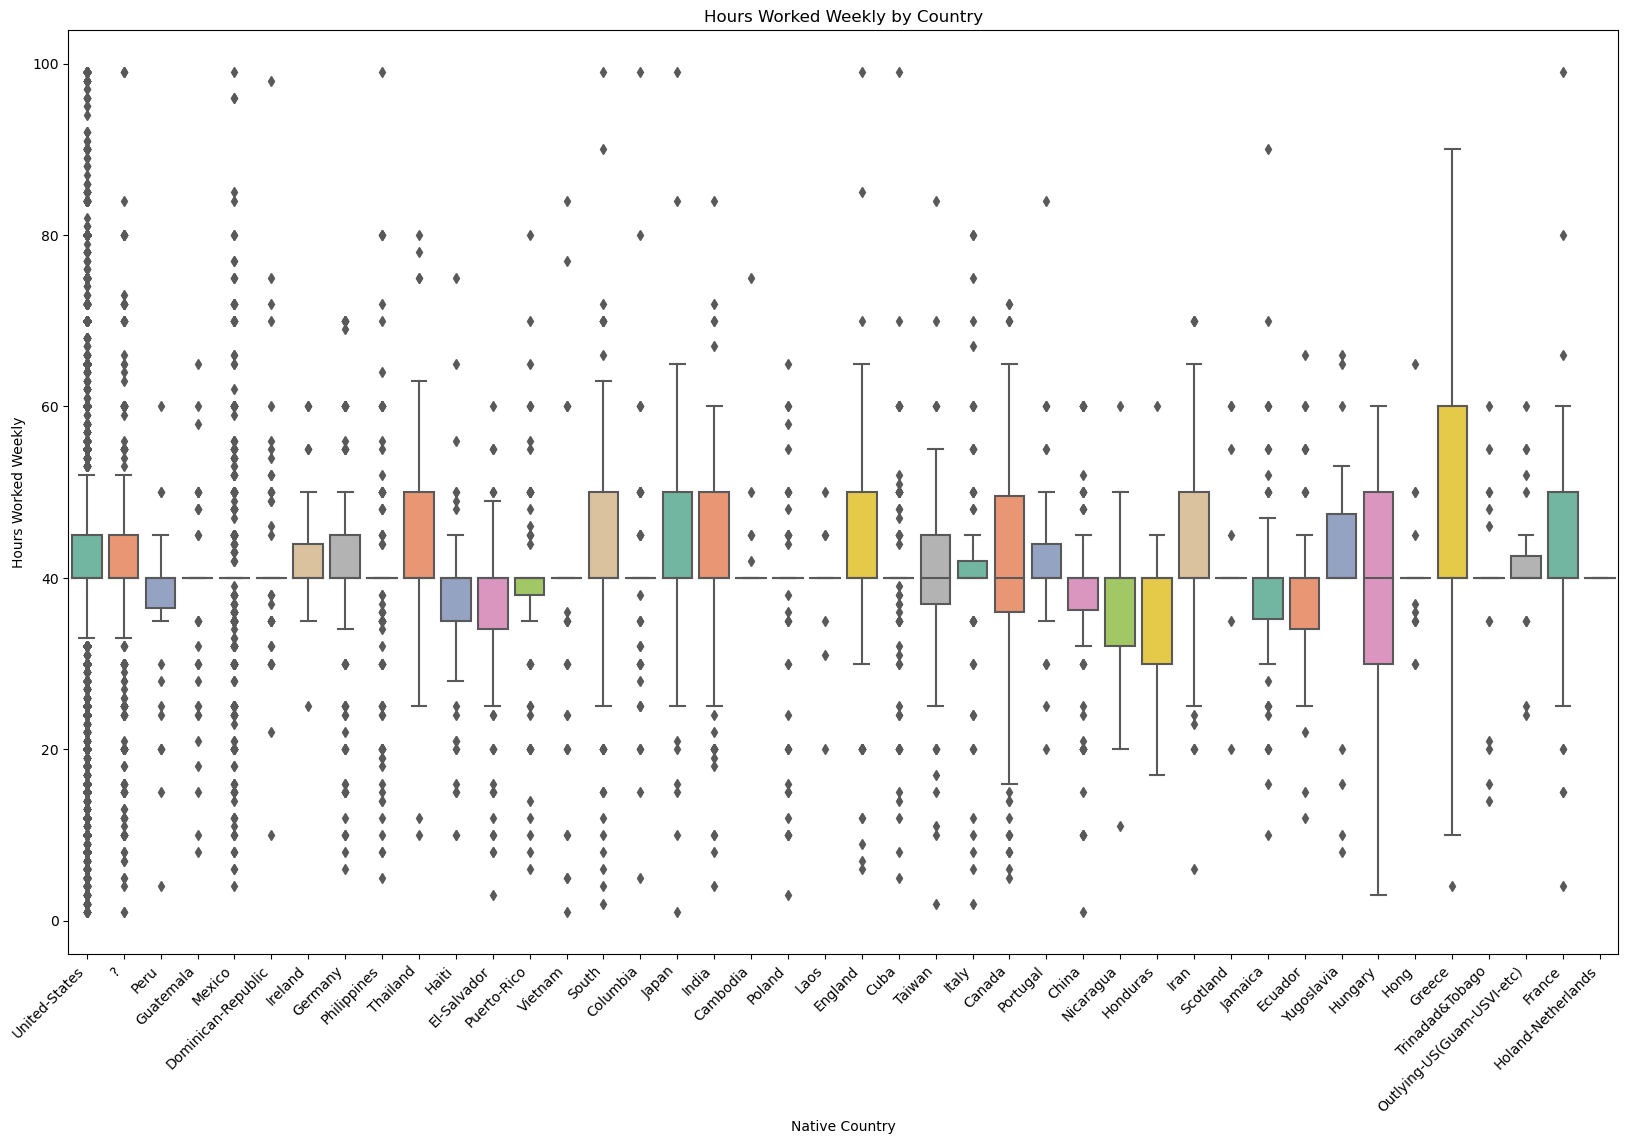

In [52]:
plot_data = df[['native-country', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(20, 12))
sns.boxplot(x='native-country', y='hours-per-week', data=plot_data, palette='Set2')
plt.title('Hours Worked Weekly by Country')
plt.xlabel('Native Country')
plt.ylabel('Hours Worked Weekly')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
#Findings - 

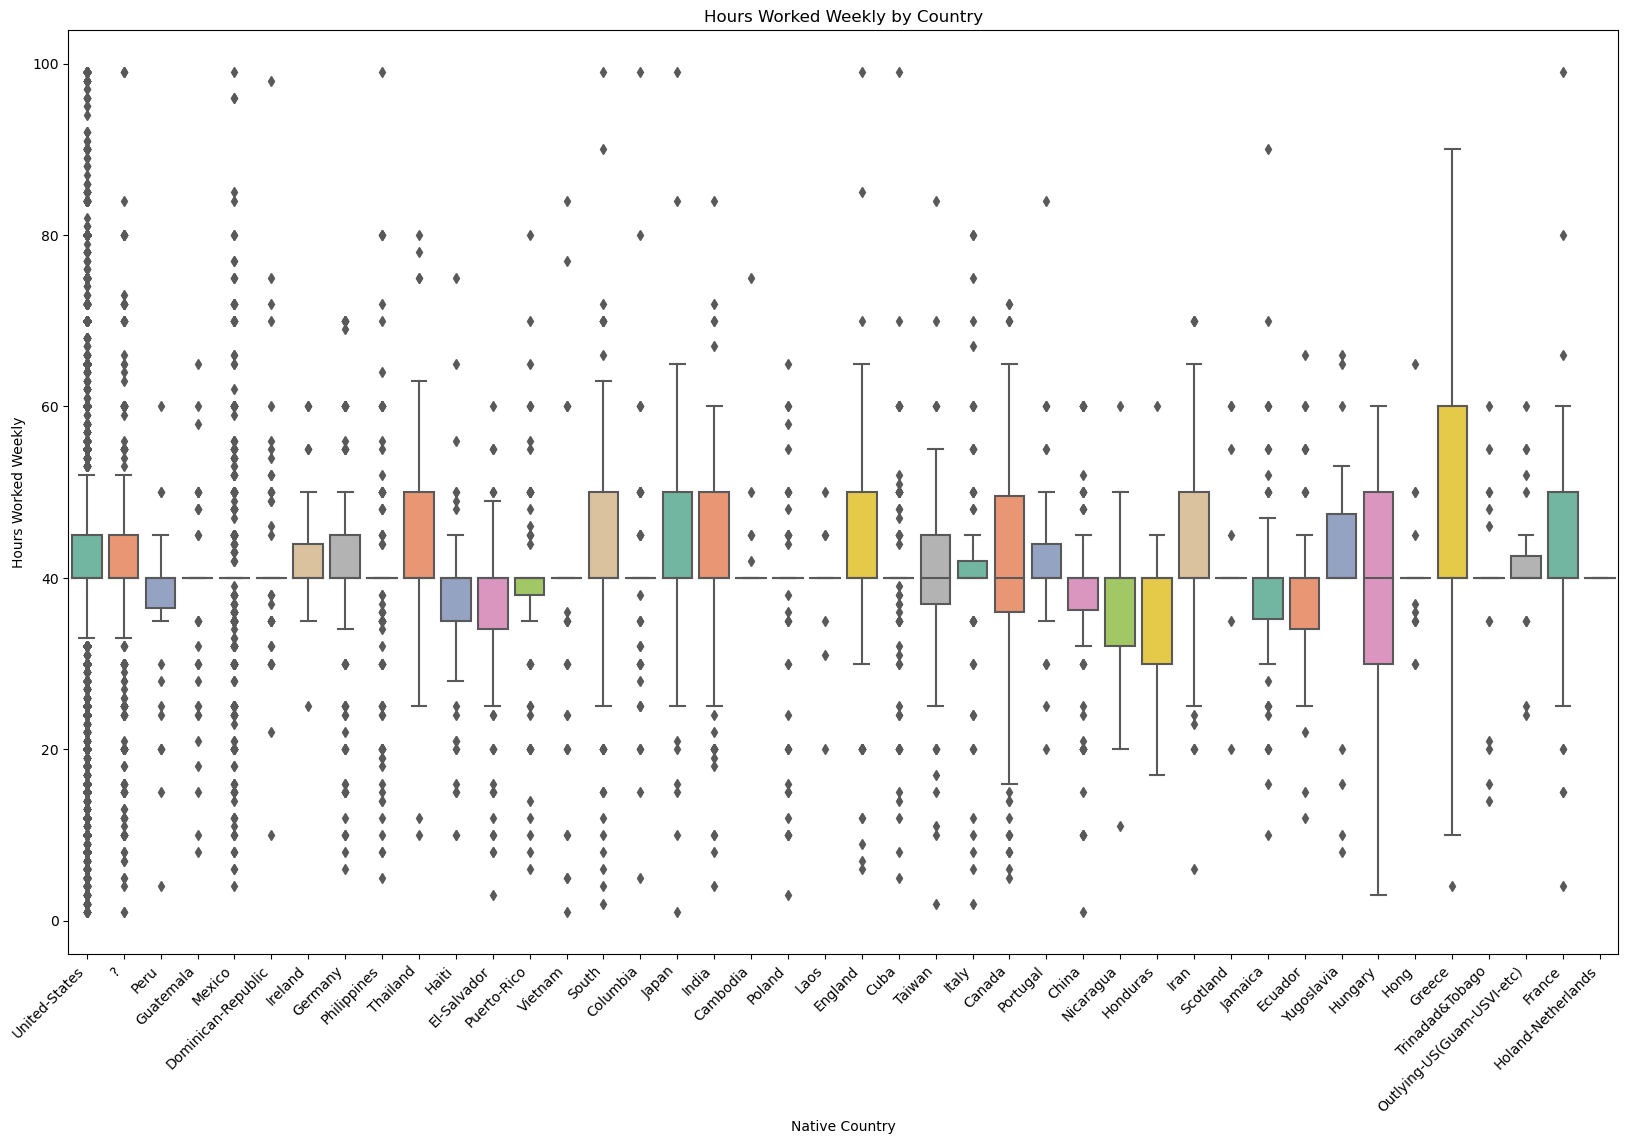

In [53]:
plot_data = df[['native-country', 'hours-per-week']]

# Create a box plot
plt.figure(figsize=(20, 12))
sns.boxplot(x='native-country', y='hours-per-week', data=plot_data, palette='Set2')
plt.title('Hours Worked Weekly by Country')
plt.xlabel('Native Country')
plt.ylabel('Hours Worked Weekly')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
#findings

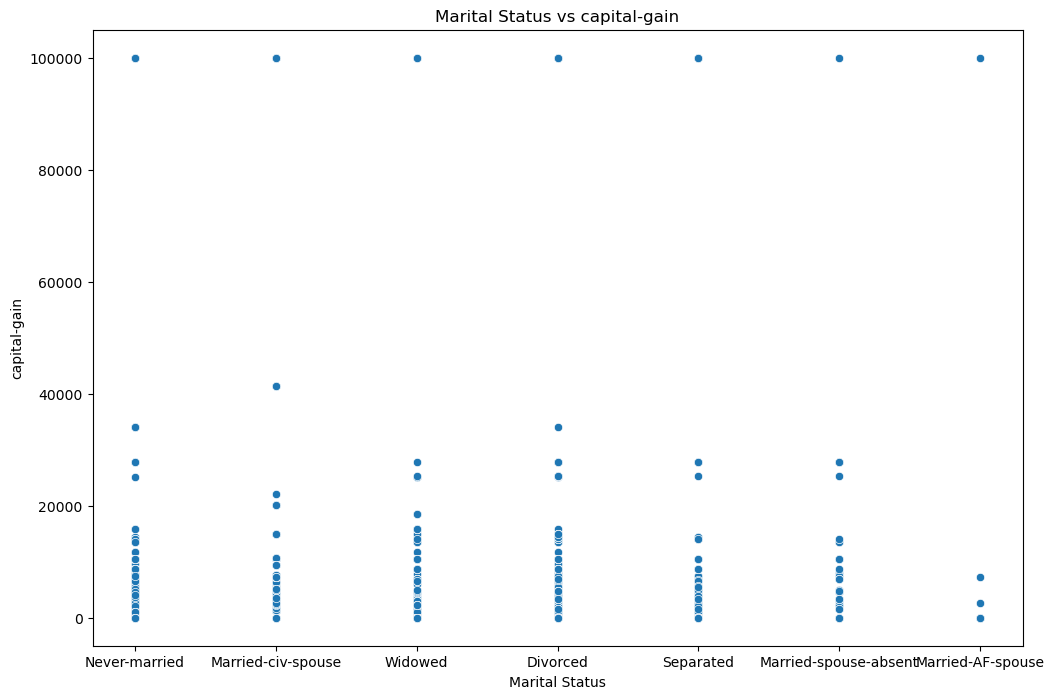

In [54]:
plot_data = df[['marital-status', 'capital-gain']]

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='marital-status', y='capital-gain', data=plot_data)
plt.title('Marital Status vs capital-gain')
plt.xlabel('Marital Status')
plt.ylabel('capital-gain')
plt.show()

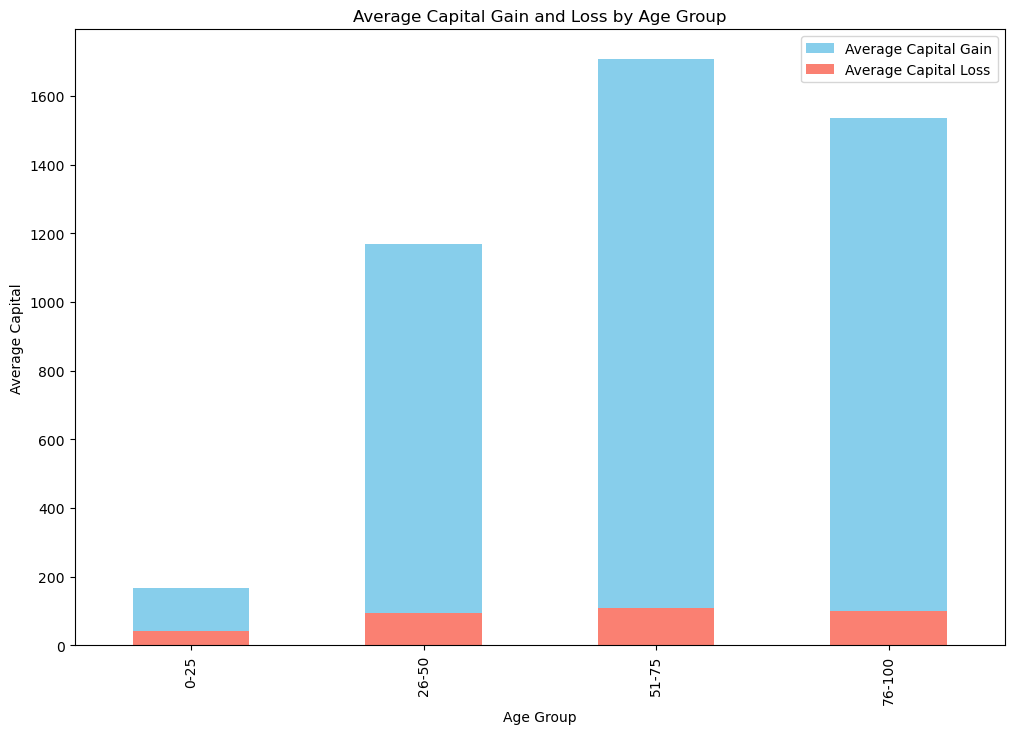

In [55]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100'])

# Calculate average capital gain and loss for each age group
avg_capital_gain = df.groupby('age_group')['capital-gain'].mean()
avg_capital_loss = df.groupby('age_group')['capital-loss'].mean()

# Plot bar chart
plt.figure(figsize=(12, 8))
avg_capital_gain.plot(kind='bar', color='skyblue', label='Average Capital Gain')
avg_capital_loss.plot(kind='bar', color='salmon', label='Average Capital Loss')
plt.title('Average Capital Gain and Loss by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Capital')
plt.legend()
plt.show()

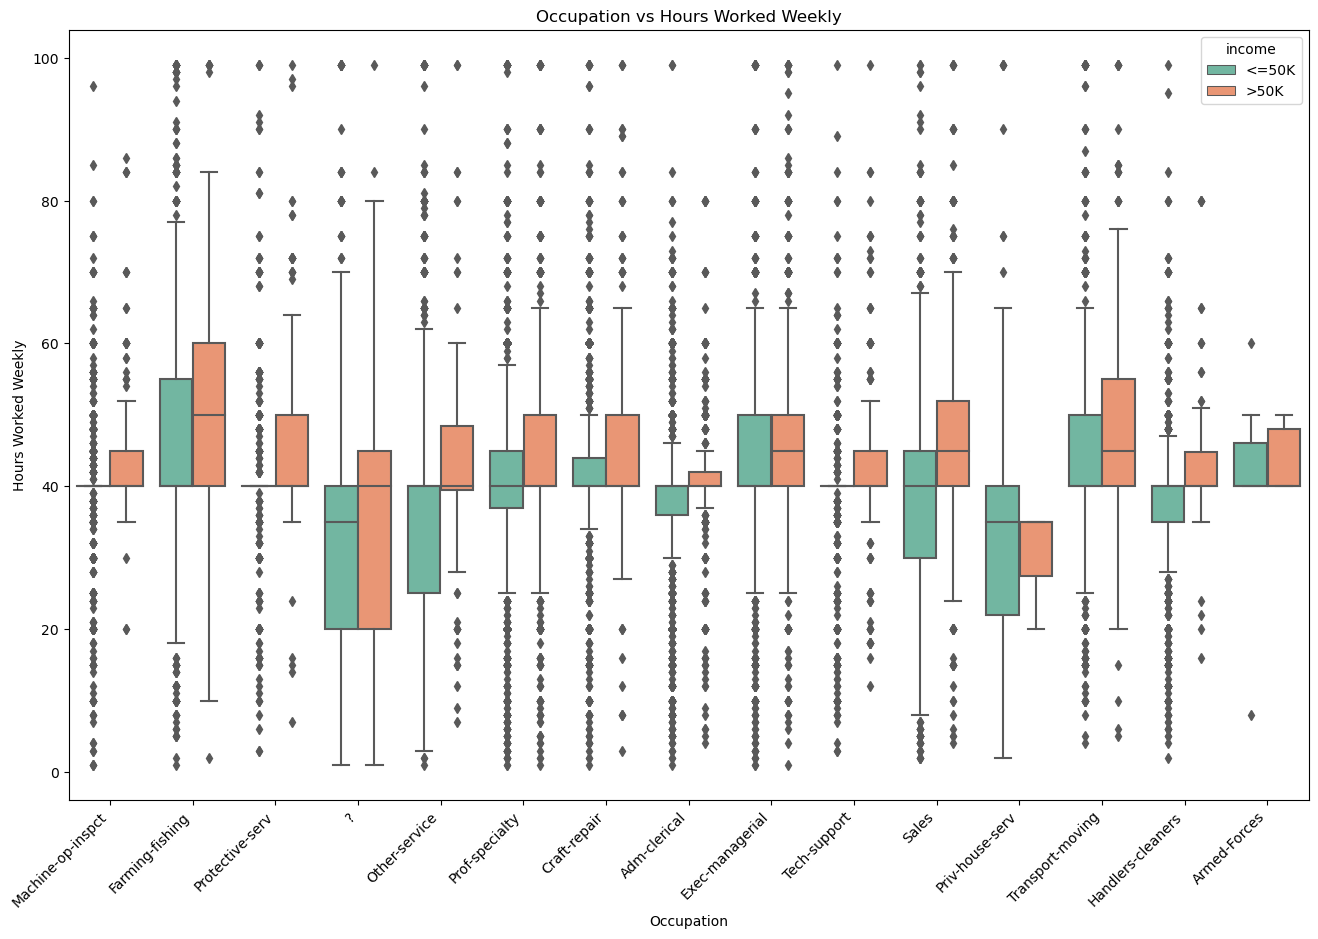

In [56]:
plot_data = df[['occupation', 'hours-per-week', 'income']]

# Create a box plot
plt.figure(figsize=(16, 10))
sns.boxplot(x='occupation', y='hours-per-week', hue='income', data=plot_data, palette='Set2')
plt.title('Occupation vs Hours Worked Weekly')
plt.xlabel('Occupation')
plt.ylabel('Hours Worked Weekly')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


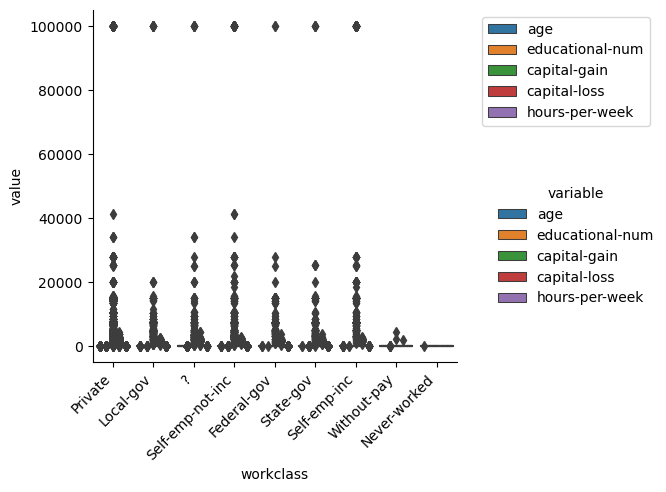

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


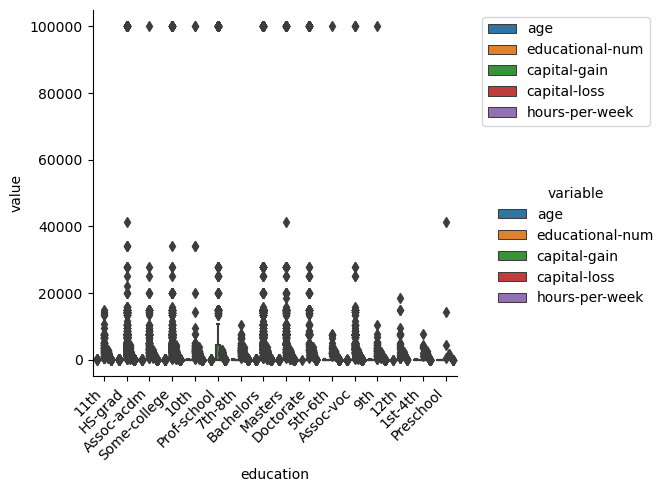

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


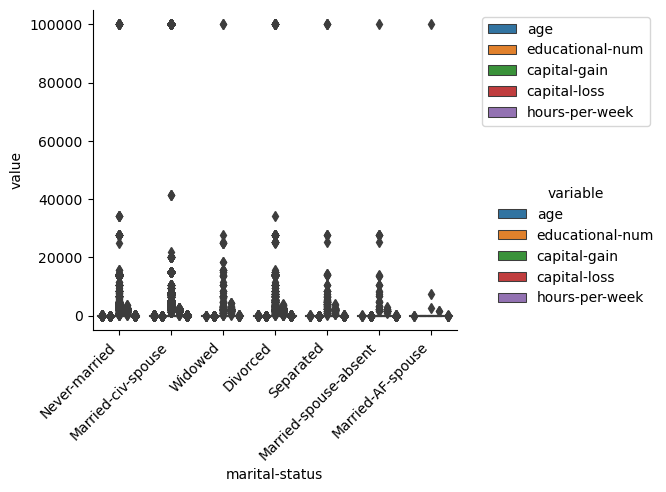

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


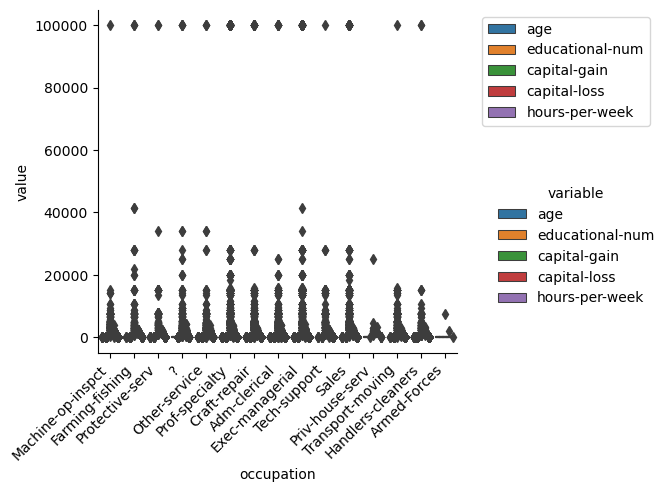

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


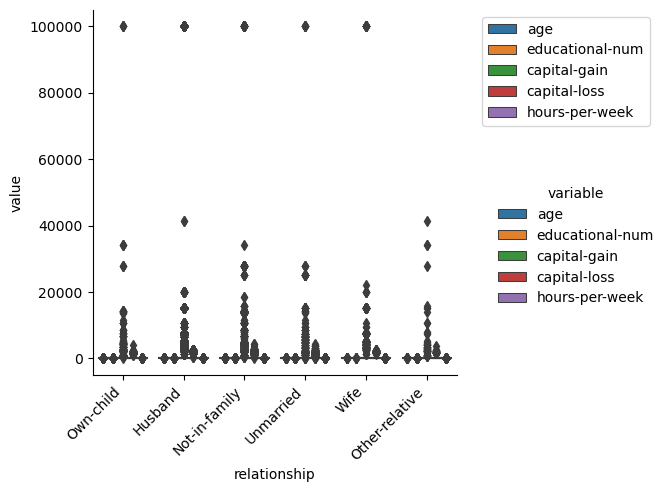

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


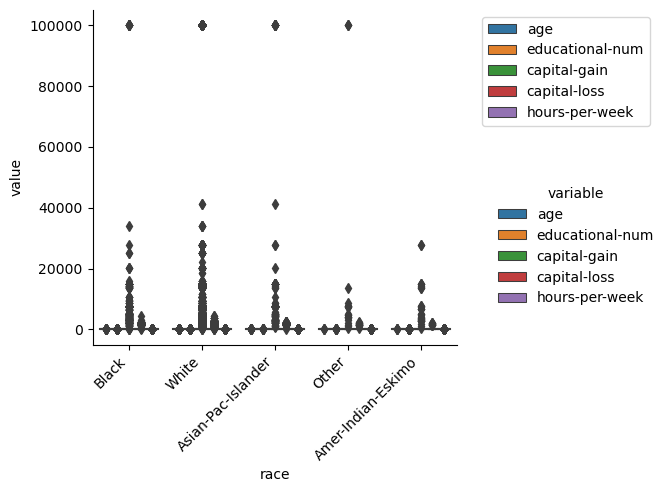

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


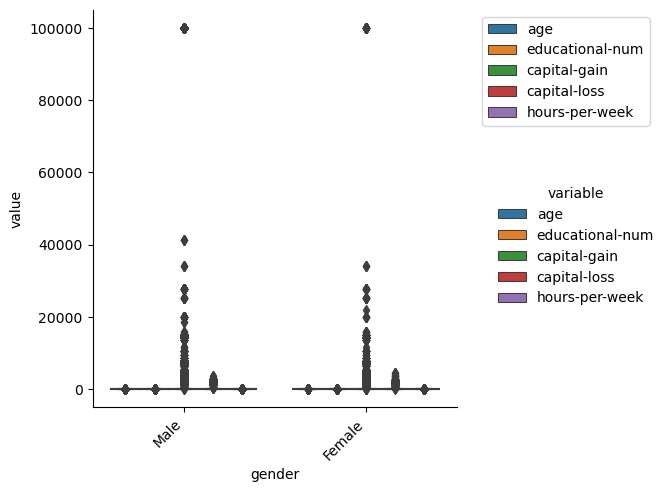

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


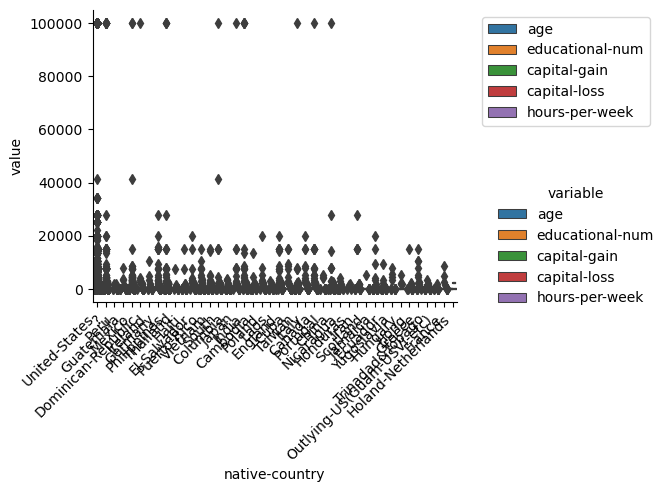

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Joshua D\AppData\Local\Temp\ipykernel_20344\3156139078.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


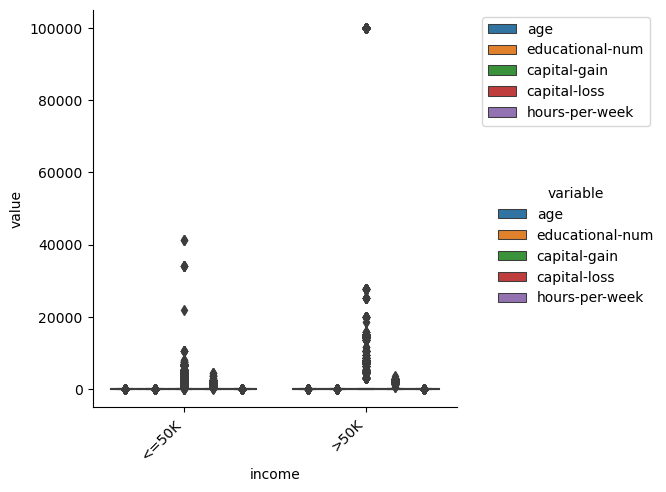

In [8]:
# lets take a look at box plot distributions for categorical features vs the  numerical features of the data set. 

y = ["age", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
x = ["workclass","education","marital-status","occupation","relationship","race","gender","native-country","income"]

for category_feature in x:
    # Creating a FacetGrid for each categorical feature
    g = sns.catplot(x=category_feature, y='value', hue='variable', kind='box', data=pd.melt(df, id_vars=category_feature, value_vars=y))
    g.set_xticklabels(rotation=45, horizontalalignment='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [26]:
#lets load and prep data for the model:
X = df.iloc[:, :13] 
y = df['income']

In [27]:
# we will need to account for the categorical features
# Encode categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

#Train and split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [28]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8240352134302386
Confusion Matrix:
 [[6576  903]
 [ 816 1474]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.88      0.88      7479
        >50K       0.62      0.64      0.63      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.76      9769
weighted avg       0.83      0.82      0.83      9769



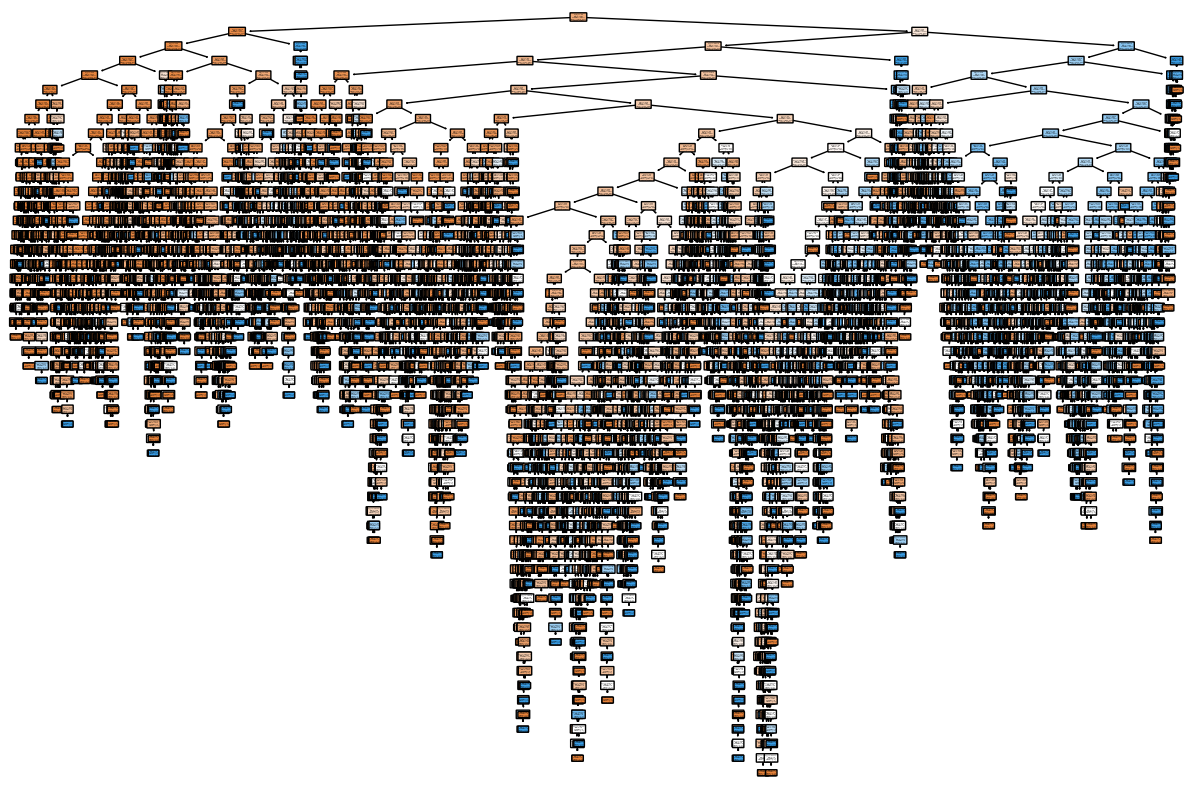

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Convert the class names to a list
class_names_list = model.classes_.tolist()

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, class_names=class_names_list, rounded=True)
plt.show()

# this shows the complete tree. however a more granular view is on specific nodes

In [7]:
#lets try another model - XG Boost model
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
# the main feature for the XGBoost will need to be binary encoded. lets check it's unique values.
print(df['income'].unique())


['<=50K' '>50K']


In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Update categorical columns list
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Encoding 'income' column
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

# Separating features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Encoding categorical features
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an XGBoost classifier
model = xgb.XGBClassifier()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Printing feature importances
print(model.feature_importances_)

0.8759340771829256
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.77      0.68      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769

[0.02981253 0.01668702 0.01118527 0.01042704 0.1330978  0.10734922
 0.02692189 0.39773527 0.01271635 0.01743735 0.13667388 0.06080461
 0.02664741 0.01250428]


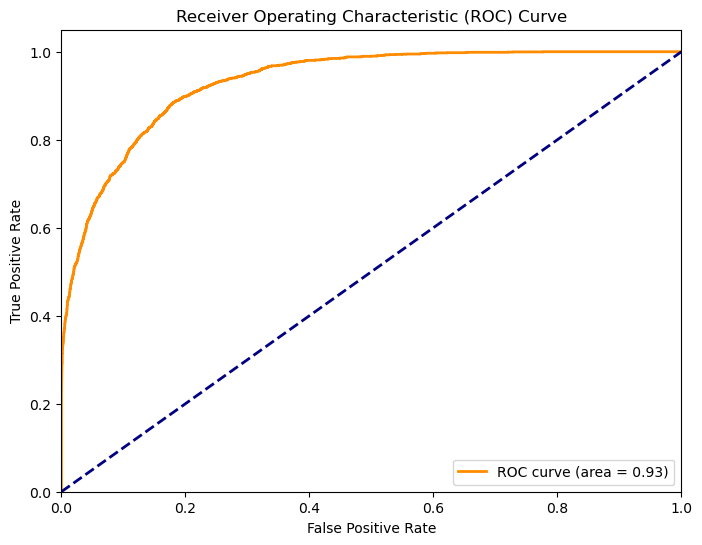

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Calculate the AUC (Area under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
# i want to see which categorical features are most influential for incomes
# Lets use the SHAP to connect the results of the model to find the more influential features
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/a3/89/f5cca6e299320e19194ad09f6014db33208a49e8d9161e729725eb17f8a8/shap-0.44.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/450.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 450.3/450.3 kB 4.7 MB/s eta 0:00:00


In [29]:
# Get feature importances
importances = model.feature_importances_

# Transform the feature importances into a pandas Series
feature_importances = pd.Series(importances, index=X.columns)

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Print out the sorted feature importances
print(sorted_importances)

relationship       0.397735
capital-gain       0.136674
educational-num    0.133098
marital-status     0.107349
capital-loss       0.060805
age                0.029813
occupation         0.026922
hours-per-week     0.026647
gender             0.017437
workclass          0.016687
race               0.012716
native-country     0.012504
fnlwgt             0.011185
education          0.010427
dtype: float32


In [32]:
#This shows the order of feature importance in predicting income.
!pip install --upgrade scikit-learn --user

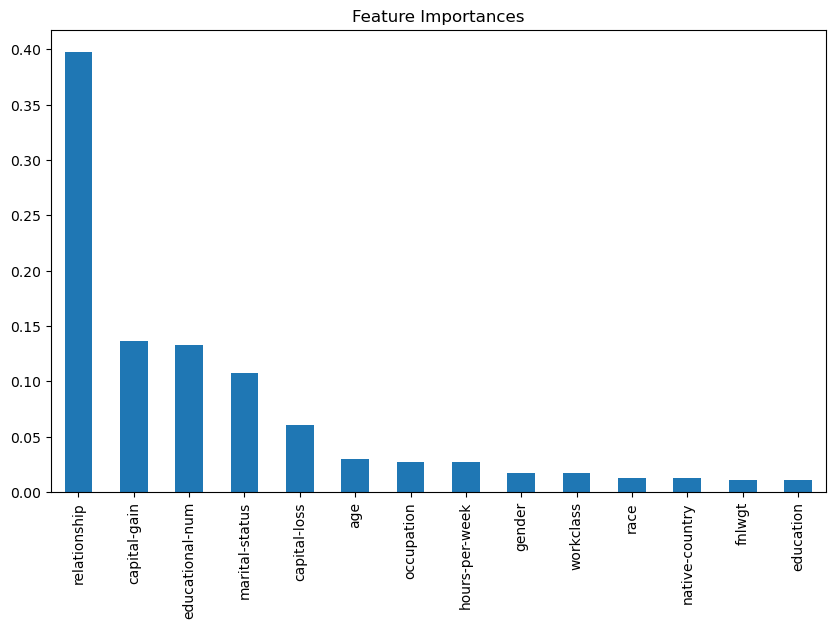

In [30]:
#Visualization
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

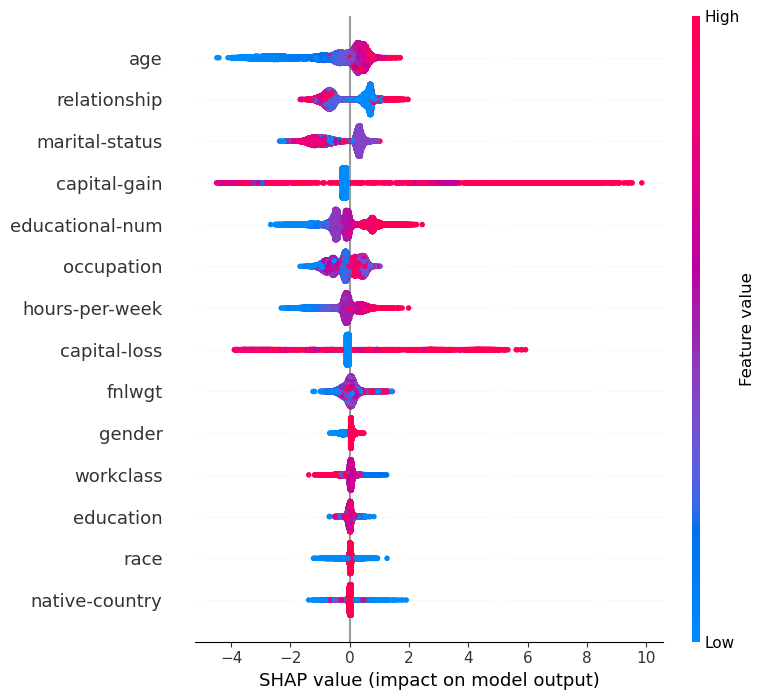

In [33]:
#lets see what kind of relationships matter the most with the XGBoost model predictions of income:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

In [ ]:
lets drill down futher to sub categorical 

Shape of SHAP values: (39073, 14)


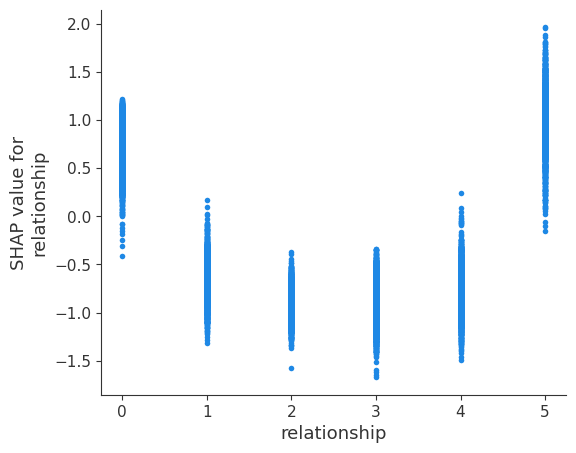

In [38]:
# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Print the shape of the SHAP values
print(f"Shape of SHAP values: {np.array(shap_values).shape}")

# Directly use the SHAP values
# Since it's not a list, we don't need to index it for class
class_shap_values = shap_values

# Make sure we have the correct shape
assert class_shap_values.shape == X_train.shape, "Mismatch in SHAP and feature shapes!"

# Plot the SHAP values for the 'relationship' feature
shap.dependence_plot('relationship', class_shap_values, X_train, interaction_index=None)


In [42]:
from sklearn.preprocessing import LabelEncoder

relationship_encoder = LabelEncoder()
df['encoded_relationship'] = relationship_encoder.fit_transform(df['relationship'])

#retrieve the mapping
relationship_mapping = dict(zip(relationship_encoder.classes_, relationship_encoder.transform(relationship_encoder.classes_)))
print(relationship_mapping)

{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}


In [ ]:
The above SHAP values for relationship sub categories and predicting income.   Essentially values that have a negative SHAP value corresponds to income (< $50K),  
postive SHAP value corresponds to (>= $50k). From this we can see the relationship type 0 and 5 have  high density above 0.0 and it influences on a person having a high income. 
While categories 2 and 3 seem to infuence the prediction of a person having a lower income.  

In [ ]:
Conclusion:

In [ ]:
The questions you asked
● The trends you investigated:
    I discovered that relationship seems to be the strongest predictor ( feature wise) for income. Using SHAP plots i saw the sub-types for relationship and which ones
    had the greatest impact on income prediction. Husband and wife seem to be the best predictors for incomes greater than $50K. It is possible that there are other features
    that influence this like education, hours per week or age. I would need to evaluate for Husband or Wife to see if the results are similar. There were other opportunities
    to investigate this in depth.
        1.  The XGBoost Model is better at predicting income for lower income vs higher income based on precision scores. 
        2.  The Cramers V-matrix indiciates a strong cross categorical features  relationship , gender and martial status. 
        3.  Exploratory data analysis shows some interesting correlations
             - Hours Worked Weekly and Marital status 
             - income and hours worked weekly
             - average captial gain/loss and Age
             - occupations and hours worked
             - education and Race

In [ ]:
● The resulting visualizations and conclusions

In [ ]:
Utlimately I went with exploring relationship  and its subtypes. Based on the individual subcategory SHAP plot the XGBoost model predicts that relationships 
involvings husband (0) and wife(5) have a predictive power for  high incomes (>= $50k). while  incomes of (<$50K) invovles other relative (2) and own-child(3).
It doesnt necessairly show a causation of a married could ( husband and wife) is the best predictor of high income  and inversely  having other relationship and having a child
is a best predictor  for lower income. 

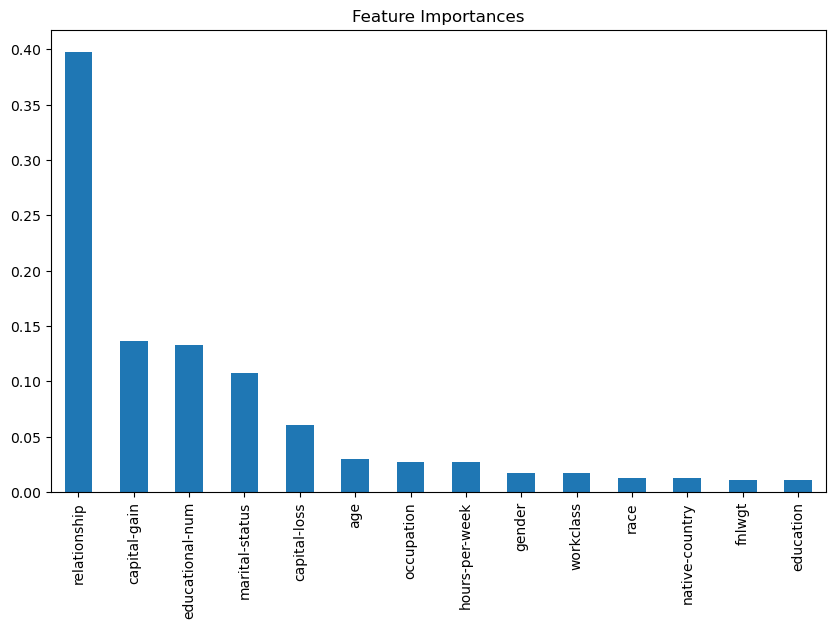

In [45]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

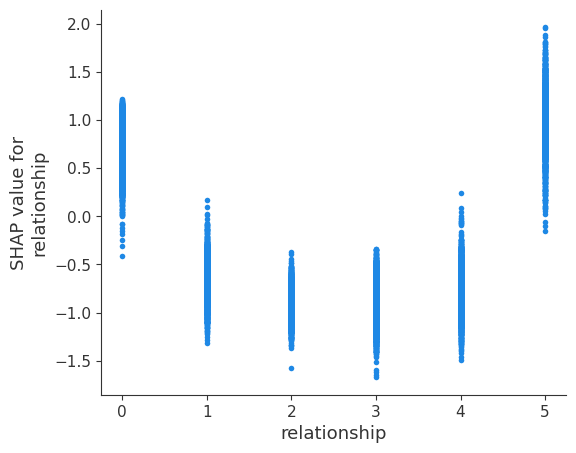

In [46]:
shap.dependence_plot('relationship', class_shap_values, X_train, interaction_index=None)